In [8]:
import numpy as np
import qiskit

# Probabilistic Bits
Combining two probabilistic bit states (p-bits) what is the probability of a given state. They difference is that the amplitude of probability is the probability, so you do not have to do the Euclidean norm with the coefficients. For instance,
$$
\begin{equation}
bit = (0.45, 0.55)^{\intercal}
\end{equation}
$$



In [3]:
P = np.array([[1/3,0],[2/3,1]])
x = np.array([0,1])

In [6]:
print(P@x)

[0. 1.]


# Qiskit Circuits

## Circuit 1

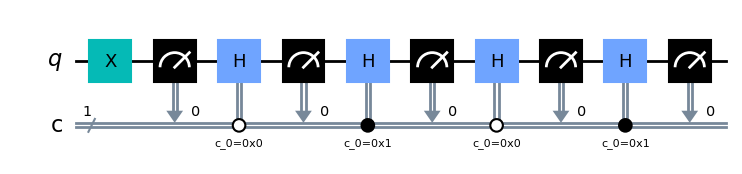

In [4]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, execute
q = QuantumRegister(1,'q')
c = ClassicalRegister(1,'c')
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.measure(q[0], 0)
qc.h(q[0]).c_if(c[0], 0)

qc.measure(q[0], 0)
qc.h(q[0]).c_if(c[0], 1)
qc.measure(q[0], 0)
qc.h(q[0]).c_if(c[0], 0)
qc.measure(q[0], 0)
qc.h(q[0]).c_if(c[0], 1)
qc.measure(q[0], 0)
qc.draw("mpl")


In [5]:
job = execute(qc, Aer.get_backend('statevector_simulator'), shots=700)
result = job.result()

In [6]:
result.get_counts()

{'0': 434, '1': 266}

## Circuit 2

In [11]:
from qiskit.quantum_info.operators import Operator
def reflection_operator(theta):
    ref_op = Operator([[np.cos(2*theta), np.sin(2*theta)],
                      [np.sin(2*theta), -np.cos(2*theta)]])
    return ref_op

def rotation_operator(phi):
    rot_op = Operator([[np.cos(phi), -np.sin(phi)],
                      [np.sin(phi), np.cos(phi)]])
    return rot_op


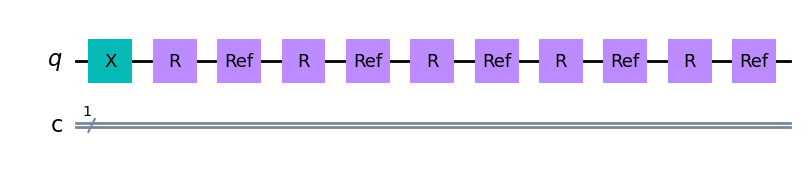

In [20]:
theta = np.pi/4
phi = np.pi/4
q = QuantumRegister(1,'q')
c = ClassicalRegister(1,'c')
qc = QuantumCircuit(q,c)
# Set qubit to state |1>
qc.x(q[0])
for i in range(5):
    qc.unitary(rotation_operator(phi), [0], label='R')
    qc.unitary(reflection_operator(theta), [0], label='Ref')
qc.draw("mpl")


In [21]:
job = execute(qc, Aer.get_backend('statevector_simulator'), shots=100)
result = job.result()
result.get_statevector()

Statevector([ 0.70710678+0.00000000e+00j, -0.70710678-8.65956056e-17j],
            dims=(2,))


## Circuit 3

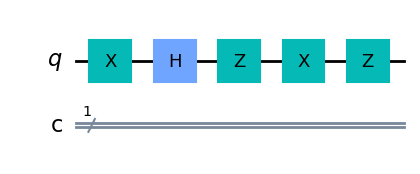

In [30]:
q = QuantumRegister(1,'q')
c = ClassicalRegister(1,'c')
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.h(q[0])
qc.z(q[0])
qc.x(q[0])
qc.z(q[0])
qc.draw("mpl")

In [31]:
job = execute(qc, Aer.get_backend('statevector_simulator'), shots=100)
result = job.result()
result.get_statevector()

Statevector([ 0.70710678+0.00000000e+00j, -0.70710678-8.65956056e-17j],
            dims=(2,))


## Circuit 4: Get the matrix of a quantum circuit

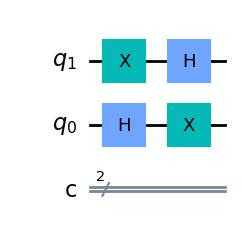

In [32]:
backend = Aer.get_backend('unitary_simulator')
q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')

qc = QuantumCircuit(q,c)

# Gates on Qubit 0
qc.x(q[1])
qc.h(q[1])

# Gates on Qubit 1
qc.h(q[0])
qc.x(q[0])


qc.draw("mpl", reverse_bits=True)

In [33]:
job = execute(qc, backend, shots=8192)
result = job.result()
print(result.get_unitary(qc,3))

Operator([[ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5-0.j],
          [ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
          [-0.5-0.j,  0.5+0.j,  0.5+0.j, -0.5-0.j],
          [-0.5-0.j, -0.5-0.j,  0.5+0.j,  0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


## Circuit 5: Apply Rotation U3 Gate

In [67]:
def U3(theta, phi, gamma):
    u3 = Operator([[np.cos(theta/2), -np.exp(1j*gamma)*np.sin(theta/2)],
                      [np.exp(1j*phi)*np.sin(theta/2), np.exp(1j*phi + 1j*gamma)*np.cos(theta/2)]])
    return u3

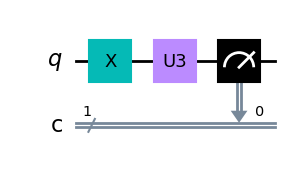

In [71]:
theta = np.pi/4
phi   = np.pi/8
gamma = np.pi/2
q = QuantumRegister(1,'q')
c = ClassicalRegister(1,'c')
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.unitary(U3(theta , phi, gamma), [0], label='U3')
qc.measure(0,0)
qc.draw("mpl", reverse_bits=True)

In [72]:

job = execute(qc, Aer.get_backend('statevector_simulator'), shots=100)
result = job.result()
result.get_counts()

{'0': 17, '1': 83}

## Cirq

In [58]:
import cirq
from cirq import H, X, measure, Y, T, SWAP

circuit = cirq.Circuit()

q0, q1, q2 = cirq.LineQubit.range(3) #create 3 qubits

circuit.append(H(q0))
circuit.append(X(q1))
circuit.append(Y(q2))
circuit.append(T.on(q0).controlled_by(q1))
circuit.append(SWAP.on(q0,q1).controlled_by(q2))

In [59]:
sim = cirq.Simulator()
results = sim.simulate(circuit)

print("the quantum state is")
print(results.dirac_notation())
print()

circuit.append(measure(q0, q1, q2, key='result'))

print("the circuit is")
print(circuit)
print()

the quantum state is
0.71j|101⟩ + (-0.5+0.5j)|111⟩

the circuit is
0: ───H───@────────×───M('result')───
          │        │   │
1: ───X───@^0.25───×───M─────────────
                   │   │
2: ───Y────────────@───M─────────────



In [60]:
def bitstring(bits):
    return "".join(str(int(b)) for b in bits)

In [61]:
samples = sim.run(circuit, repetitions=1000)
print("outcomes:", samples.histogram(key='result', fold_func=bitstring))

outcomes: Counter({'111': 511, '101': 489})
